# <center> Unsupervised learning: Clusterings </center>

## 1. Partitioning clustering: `k-means`

![](https://miro.medium.com/max/1280/1*5UHmgCaTD8EegsPuKcxC1Q.png)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:

import warnings
warnings.filterwarnings("ignore")


In [6]:
iris = sns.load_dataset('iris')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


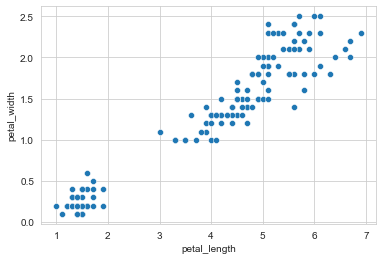

In [7]:
sns.set_style('whitegrid')
sns.scatterplot(data=iris,
               x='petal_length',
               y='petal_width',
#                hue='species'
               )
plt.show()

In [9]:
from sklearn.cluster import KMeans

In [11]:
x,y = iris[['petal_length','petal_width']],iris['species']
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [20]:
ypred = kmeans.predict(x)
value_map = {0: 'setosa' , 1:'versicolor' , 2: 'virginica'}
ypred = np.array([value_map[i] for i in ypred])
ypred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'vir

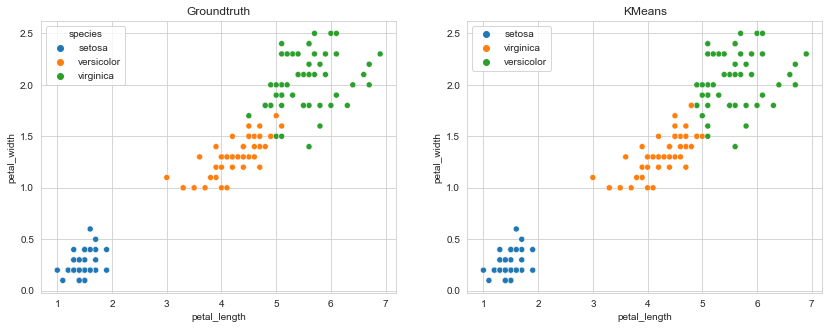

In [23]:
fig, axs = plt.subplots(1,2, figsize=(14,5)) #1 hàng 2 cột
sns.set_style('whitegrid')
ax = sns.scatterplot(data=x,
               x='petal_length',
               y='petal_width',
                hue=y,
                ax = axs[0]
               )
ax.set_title('Groundtruth')
ax1 = sns.scatterplot(data=x,
               x='petal_length',
               y='petal_width',
                hue=ypred,
                ax = axs[1]
               )
ax1.set_title('KMeans')
plt.show()

In [26]:
kmeans.inertia_

31.371358974358966

In [37]:
sse = []
for i in range(1,10): # from 1 to 10 cluster, which number of clusters is optimal?
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append((i, km.inertia_))

sse = np.array(sse)
sse


array([[  1.        , 550.89533333],
       [  2.        ,  86.39021985],
       [  3.        ,  31.37135897],
       [  4.        ,  19.46598901],
       [  5.        ,  13.91690876],
       [  6.        ,  11.07770167],
       [  7.        ,   9.20331401],
       [  8.        ,   7.7299033 ],
       [  9.        ,   6.45649454]])

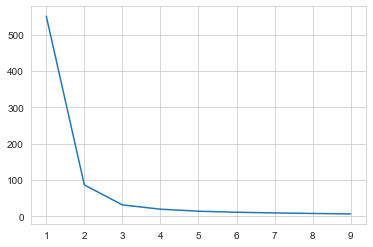

In [39]:
fig = plt.figure()
plt.plot(sse[:,0], sse[:,1])
plt.show()


## 2. Hierachical clustering: `agglomerative clustering` 
![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/03/Screen-Shot-2018-03-28-at-11.48.48-am.png)
![](https://miro.medium.com/max/1039/0*afzanWwrDq9vd2g-)

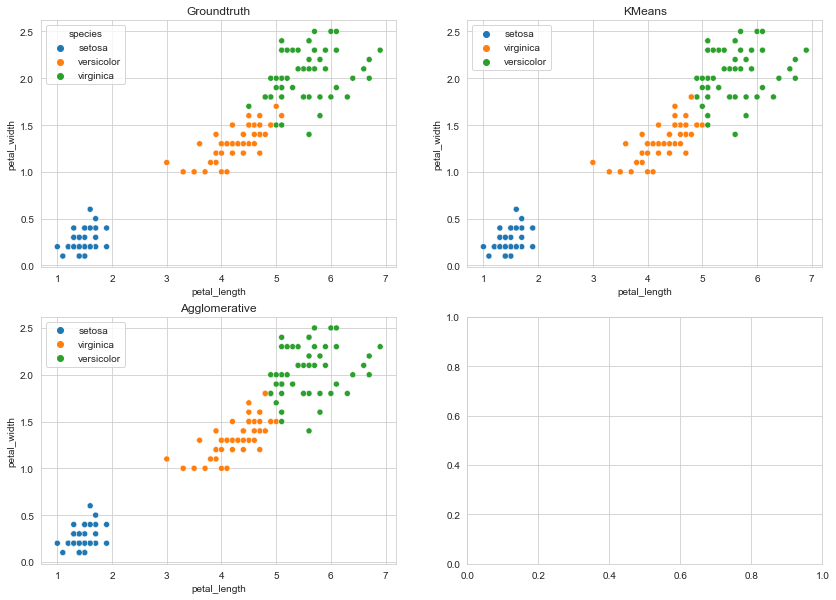

In [43]:
fig, axs = plt.subplots(2,2, figsize=(14,10)) #1 hàng 2 cột
sns.set_style('whitegrid')
ax = sns.scatterplot(data=x,
               x='petal_length',
               y='petal_width',
                hue=y,
                ax = axs[0,0]
               )
ax.set_title('Groundtruth')
ax1 = sns.scatterplot(data=x,
               x='petal_length',
               y='petal_width',
                hue=ypred,
                ax = axs[0,1]
               )
ax1.set_title('KMeans')
ax2 = sns.scatterplot(data=x,
               x='petal_length',
               y='petal_width',
                hue=ypred,
                ax = axs[1,0]
               )
ax2.set_title('Agglomerative')
plt.show()

## 3. Density-based clustering: `DBSCAN`
![](https://user-images.githubusercontent.com/7659/74451662-d2325000-4e34-11ea-9770-a57e81259eb9.png)
![](https://miro.medium.com/proxy/1*tc8UF-h0nQqUfLC8-0uInQ.gif)